In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/Users/mukaddercinar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/mukaddercinar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
DF = pd.read_csv("NYC_Citywide_Annualized_Calendar_Sales_Update-3.csv")

In [3]:
DF.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL,ADDRESS,APARTMENT NUMBER,...,SALE PRICE,SALE DATE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1,FINANCIAL,14 RENTALS - 4-10 UNIT,2A,7,38,NaN,S9,60 PEARL STREET,NaN,...,4027000,01/01/2016,40.703553,-74.011152,101.0,1.0,9.0,1000014.0,1.000070e+09,Battery Park City-Lower Manhattan
1,1,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1,1643,122,NaN,A4,155 EAST 115 STREET,NaN,...,0,01/01/2016,40.797761,-73.941667,111.0,8.0,182.0,1052276.0,1.016430e+09,East Harlem North
2,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,2,1643,123,NaN,C5,157 EAST 115 STREET,NaN,...,0,01/01/2016,40.797744,-73.941627,111.0,8.0,182.0,1052277.0,1.016430e+09,East Harlem North
3,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1320,4247,NaN,R4,211 EAST 46TH STREET,33J,...,0,01/01/2016,40.753118,-73.972085,106.0,4.0,90.0,1037599.0,1.013208e+09,Turtle Bay-East Midtown
4,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1365,1526,NaN,R4,400 EAST 54TH STREET,30H,...,0,01/01/2016,40.756237,-73.963995,106.0,4.0,8603.0,1076281.0,1.013658e+09,Turtle Bay-East Midtown


In [4]:
DF.shape

(345059, 29)

In [5]:
#replace the white space in columns by an underscore
DF.columns =DF.columns.str.replace(' ', '_')

In [6]:
# switching the column names to lowercase
DF.columns = map(str.lower, DF.columns)

In [7]:
DF.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_as_of_final_roll', 'block', 'lot', 'ease-ment',
       'building_class_as_of_final_roll', 'address', 'apartment_number',
       'zip_code', 'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date', 'latitude', 'longitude', 'community_board',
       'council_district', 'census_tract', 'bin', 'bbl', 'nta'],
      dtype='object')

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345059 entries, 0 to 345058
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   borough                          345059 non-null  int64  
 1   neighborhood                     345059 non-null  object 
 2   building_class_category          345059 non-null  object 
 3   tax_class_as_of_final_roll       341199 non-null  object 
 4   block                            345059 non-null  int64  
 5   lot                              345059 non-null  int64  
 6   ease-ment                        0 non-null       float64
 7   building_class_as_of_final_roll  341199 non-null  object 
 8   address                          345059 non-null  object 
 9   apartment_number                 74790 non-null   object 
 10  zip_code                         345044 non-null  float64
 11  residential_units                329081 non-null  float64
 12  co

In [9]:
# drop the columns that have a lot of missing values
DF = DF.drop(columns = ["ease-ment","apartment_number"])

In [10]:
DF = DF.dropna() #drop the rows that have missing values

In [11]:
#Data in a certain range.
df = DF[(DF.sale_price >= 500000) & (DF.sale_price < 900000)]

In [12]:
# Getting rid of redundant text variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
df = df.select_dtypes(exclude=['object'])
df.shape

(68265, 17)

In [13]:
df.describe()

,borough,block,lot,zip_code,residential_units,commercial_units,total_units,year_built,tax_class_at_time_of_sale,sale_price,latitude,longitude,community_board,council_district,census_tract,bin,bbl
count,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,6.826500e+04,6.826500e+04
mean,3.190244,4848.854830,309.586904,10866.520384,1.298982,0.057907,1.403340,1882.092038,1.387431,676264.018370,40.700562,-73.927972,326.836109,28.472321,10288.754325,3.343994e+06,3.228412e+09
std,1.281982,3694.284084,570.900308,641.838910,2.899564,1.455380,3.672728,364.043448,0.588042,112241.168943,0.084357,0.115303,127.575357,15.601989,27539.257963,1.325254e+06,1.308975e+09
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,500000.000000,40.499050,-74.254032,101.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,2.000000,1555.000000,22.000000,10309.000000,1.000000,0.000000,1.000000,1925.000000,1.000000,580000.000000,40.636294,-73.981745,212.000000,18.000000,167.000000,2.101698e+06,2.054290e+09
50%,3.000000,4228.000000,48.000000,11210.000000,1.000000,0.000000,1.000000,1945.000000,1.000000,665000.000000,40.700756,-73.928289,318.000000,29.000000,479.000000,3.421399e+06,3.084130e+09
75%,4.000000,7216.000000,165.000000,11365.000000,2.000000,0.000000,2.000000,1970.000000,2.000000,768000.000000,40.757896,-73.845359,411.000000,43.000000,1201.000000,4.253391e+06,4.097368e+09
max,5.000000,16350.000000,9002.000000,11697.000000,376.000000,259.000000,376.000000,2019.000000,4.000000,899999.000000,40.912572,-73.701405,503.000000,51.000000,157903.000000,5.516445e+06,5.080500e+09


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68265 entries, 76 to 345058
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   borough                    68265 non-null  int64  
 1   block                      68265 non-null  int64  
 2   lot                        68265 non-null  int64  
 3   zip_code                   68265 non-null  float64
 4   residential_units          68265 non-null  float64
 5   commercial_units           68265 non-null  float64
 6   total_units                68265 non-null  float64
 7   year_built                 68265 non-null  float64
 8   tax_class_at_time_of_sale  68265 non-null  int64  
 9   sale_price                 68265 non-null  int64  
 10  latitude                   68265 non-null  float64
 11  longitude                  68265 non-null  float64
 12  community_board            68265 non-null  float64
 13  council_district           68265 non-null  f

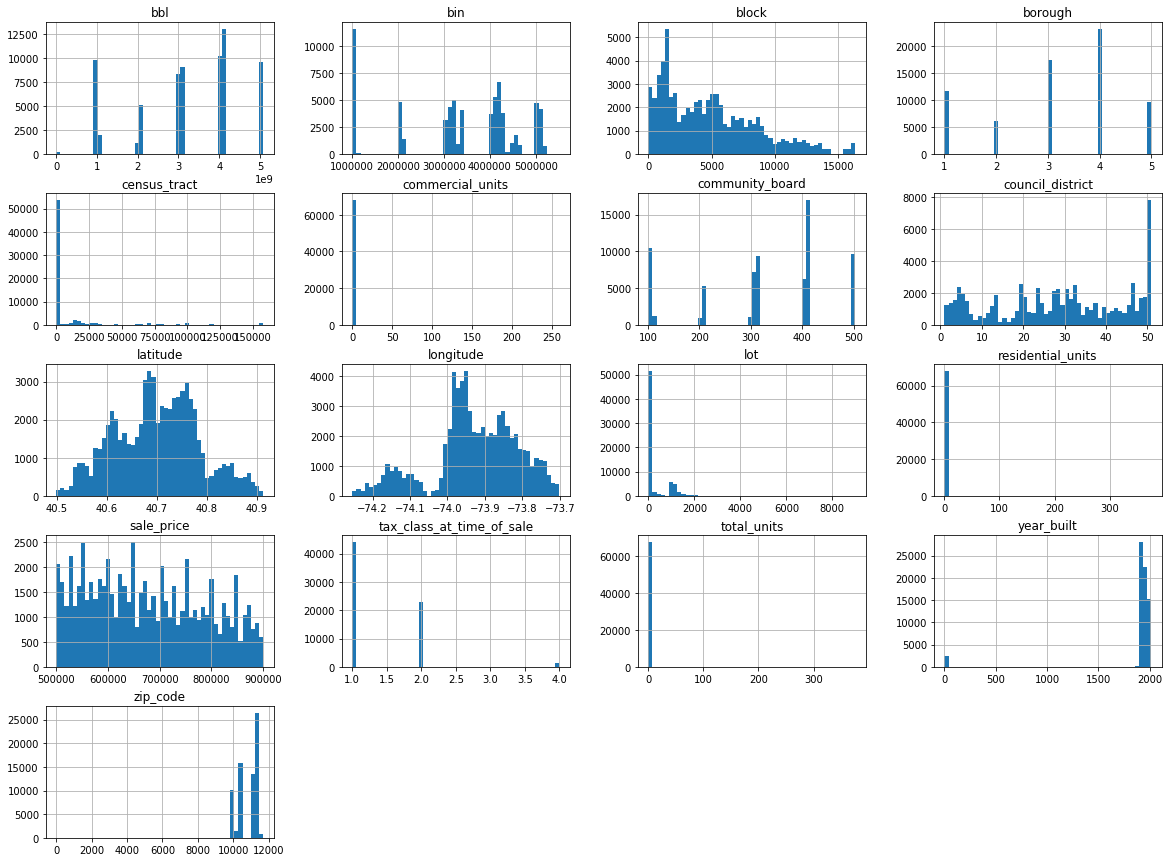

In [15]:
df.hist(bins=50, figsize = (20, 15))
plt.show()

In [16]:
# The target variable is borough 
y = df.borough
df = df.drop("borough", axis = 1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42, stratify=y) 

In [18]:
X_train.shape

(54612, 16)

In [19]:
X_test.shape

(13653, 16)

In [20]:
# number of unique values of borough
borough_unique_values = y_train.nunique()
borough_unique_values

5

#### NYC Borough Numbers
1 Manhattan

2 Bronx

3 Brooklyn

4 Queens

5 Staten Island

Text(0, 0.5, 'Second principal component')

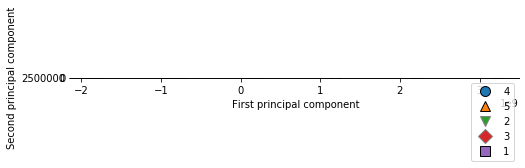

In [21]:
from sklearn.decomposition import PCA
y_train_names =  y_train.unique()
# keep the first two principal components of the data
pca1 = PCA(n_components=2)
# fit PCA model to data
pca1.fit(X_train)

# transform data onto the first two principal components
X_pca1 = pca1.transform(X_train)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], y_train)
plt.legend(y_train_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [22]:
feature_names = list(X_train.columns.values.tolist())
feature_names

['block',
 'lot',
 'zip_code',
 'residential_units',
 'commercial_units',
 'total_units',
 'year_built',
 'tax_class_at_time_of_sale',
 'sale_price',
 'latitude',
 'longitude',
 'community_board',
 'council_district',
 'census_tract',
 'bin',
 'bbl']

Text(0, 0.5, 'Principal components')

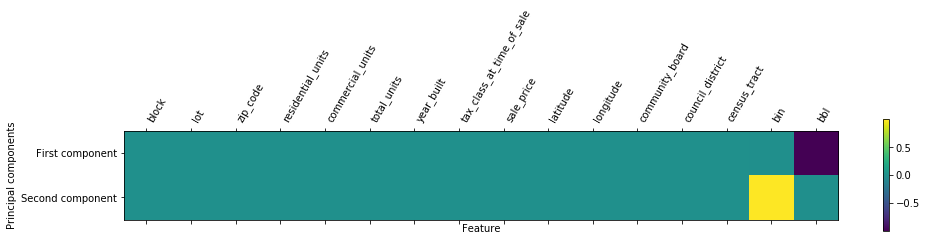

In [23]:
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),
           X_train.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Scale Data

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

In [25]:
X_scaled.shape

(54612, 16)

Text(0, 0.5, 'Second principal component')

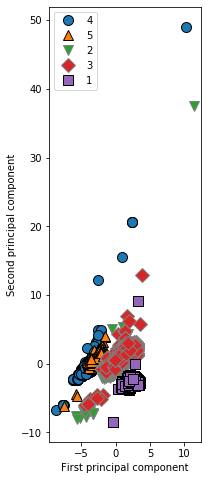

In [26]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], y_train)
plt.legend(y_train_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

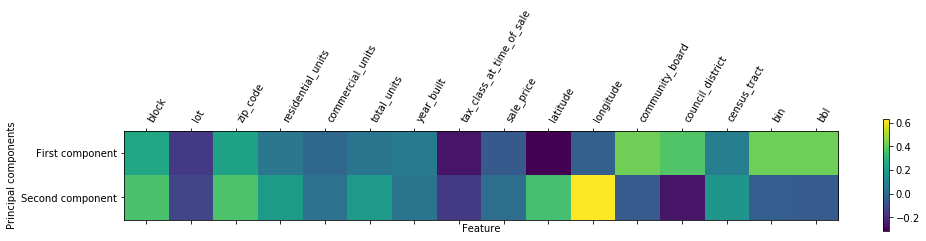

In [27]:
plt.matshow(pca2.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),
           X_train.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Text(0, 0.5, 'Second basis component')

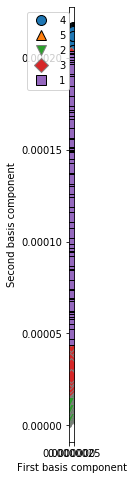

In [28]:
from sklearn.decomposition import NMF
# keep the first two principal components of the data
nmf = NMF(n_components=2, random_state=0)
# fit NMF model to data
nmf.fit(abs(X_train))
    
# transform data onto the first two principal components
X_nmf = nmf.transform(abs(X_scaled))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_nmf[:, 0], X_nmf[:, 1], y_train)
plt.legend(y_train_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

### Run NMF on data

Text(0, 0.5, 'Second basis component')

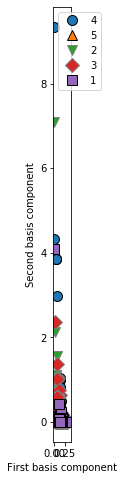

In [29]:
from sklearn.decomposition import NMF
# keep the first two principal components of the data
nmf = NMF(n_components=2, random_state=0)
# fit NMF model to data
nmf.fit(abs(X_scaled))
    
# transform data onto the first two principal components
X_nmf = nmf.transform(abs(X_scaled))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_nmf[:, 0], X_nmf[:, 1], y_train)
plt.legend(y_train_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

### Run t-SNE on unscaled data

Text(0, 0.5, 'Second basis component')

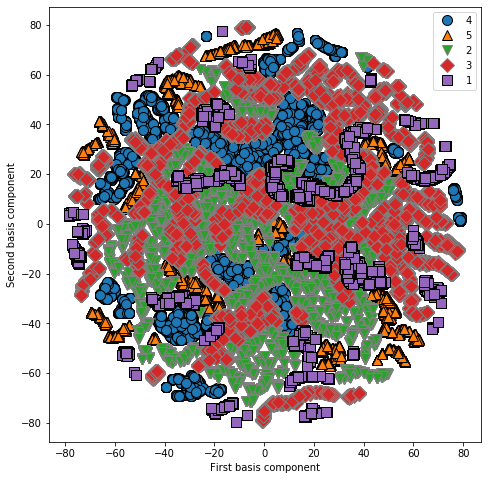

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_train)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], y_train)
plt.legend(y_train_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

### t-SNE on scaled data

Text(0, 0.5, 'Second basis component')

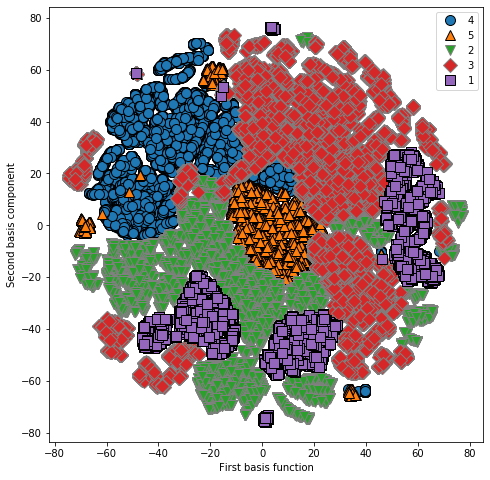

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], y_train)
plt.legend(y_train_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

## Dimensionality Reduction with PCA

#### Explained variance in PCA

In [32]:
# keep the first two principal components of the data
pca3 = PCA()
# fit PCA model to data
pca3.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca3.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[3.13720896e-01 1.36252350e-01 1.17167092e-01 8.21080078e-02
 6.39818718e-02 6.28165357e-02 5.75743810e-02 4.93387970e-02
 4.10955198e-02 3.12072419e-02 2.55567088e-02 7.30468261e-03
 6.07795798e-03 4.66731969e-03 9.61339545e-04 1.69298645e-04]


In [33]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca4.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.3137209  0.13625235 0.11716709 0.08210801 0.06398187 0.06281654
 0.05757438 0.0493388  0.04109552 0.03120724]


#### PCA as pre-processing step for classification

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


model=LogisticRegression().fit(X_train, y_train)
#model = SVC(kernel='poly', C=10).fit(X_train, y_train)
#model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))



Accuracy on training set: 0.74
Accuracy on test set: 0.74


In [36]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)
# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model=LogisticRegression().fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 1.00


#### Find the optimal number of clusters

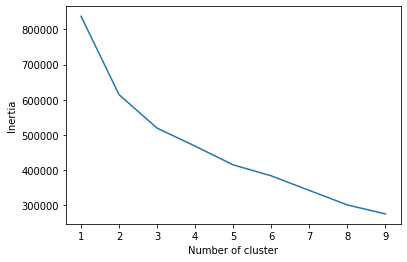

In [37]:
from sklearn.cluster import KMeans
inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()